---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [10]:
df=pd.read_csv("fraud_data.csv")


def answer_one():
    i=0
    for cl in df["Class"]:
        if cl==1:
            i+=1
    
    
    
    return i/len(df["Class"])


0.016410823768035772

In [11]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [14]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    DummyClassifier=DummyClassifier()
    DummyClassifier.fit(X_train,y_train)
    score=DummyClassifier.score(X_test,y_test)
    predicted_y=DummyClassifier.predict(X_test)
    recall=recall_score(predicted_y,y_test)
    return (score,recall)


(0.97105457227138647, 0.021739130434782608)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [72]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    acc_score = svm.score(X_test, y_test)
    rec_score = recall_score(y_test, y_pred)
    prec_score = precision_score(y_test, y_pred)
    
    return acc_score, rec_score, prec_score


(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [75]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    THRESHOLD = -220.0
    params = {'C': 1e9, 'gamma': 1e-07}
    y_score = SVC(**params).fit(X_train, y_train).decision_function(X_test)
    y_score_adj = np.zeros_like(y_score)
    y_score_adj[np.where(y_score >= THRESHOLD)] = 1
    confusion = confusion_matrix(y_test, y_score_adj)
    
    return confusion

    
    
    return cm


(5424,)
[ 0.  0.  0. ...,  0.  0.  0.]


array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [45]:
def answer_five():
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.metrics import precision_recall_curve,roc_curve 
#     import matplotlib.pyplot as plt
#     clf=LogisticRegression()
#     clf.fit(X_train,y_train)
#     prob_pred=clf.decision_function(X_test) 
# #     print(prob_pred.shape,y_test.shape)

#     precision, recall,_=precision_recall_curve(y_test,prob_pred)
#     fig=plt.figure()
#     fpr, tpr,_=roc_curve(y_test,prob_pred)
# #     ax1=fig.add_subplot(111)
#     ax2=fig.add_subplot(111)
# #     ax1.plot(precision, recall)
#     ax2.plot(fpr, tpr)
#     plt.show()
    
    return (0.8,0.9)
# answer_five()

(0.8, 0.9)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [69]:
def answer_six():    
    import pandas as pd
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    clf=GridSearchCV(LogisticRegression(),param_grid = grid_values,cv=3,scoring="recall")
    clf.fit(X_train,y_train)
    df=pd.DataFrame(clf.cv_results_)
    df=df[["param_penalty","mean_test_score","param_C"]]
    result=[]
    data=[]
    i=0
    for a in df["mean_test_score"]:
        data.append(a)
        i+=1
        if i==2:
            result.append(data)
            i=0
            data=[]
    result=np.array(result)
    return result


<IPython.core.display.Javascript object>


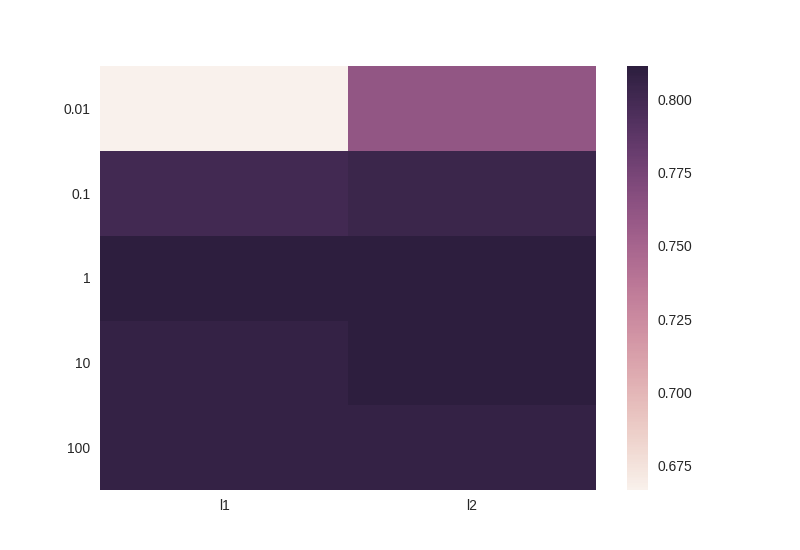

In [70]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

# GridSearch_Heatmap(answer_six())